In [17]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math
from scipy.optimize import root_scalar

def restricao1(n):
  """Restrição de n >= 0"""
  penalidade = 10e12
  # n >= 1 => n - 1 >= 0 => -n + 1 <= 0

  return penalidade * (max([0, -n + 1.0])**2)

def restricao2(r):
  """Restrição de v <= vc"""
  vc = 20.0
  penalidade = 10e12
  g, m, kc = 9.8, 100.0, 0.42
  c = kc * 2 * np.pi * (r**2)
  z0 = 500

  def posicao (t):
    return z0 - ((g * m) / c)*t + ((g * (m**2)) / (c**2))*(1 - np.e**(-(c / m)*t))

  try:
    sol = root_scalar(posicao, method='bisect', bracket=[0.0, 10e6])
  except ValueError:
    print(r, c)

  t = sol.root

  velocidade = ((g * m) / c)*(1 - np.e**(-(c / m)*t)) - vc

  return penalidade * (max([0, velocidade])**2)

def custo(lmbda, constantes, x, d):
  """Função que representa o custo para se fabricar os paraquedas."""
  [c0, c1, c2] = constantes
  [n, r] = x
  [d1, d2] = d

  n = n + lmbda * d1
  r = r + lmbda * d2

  penalidade1 = restricao1(n)
  penalidade2 = restricao2(r)

  return n * (c0 + c1*(np.sqrt(2)*r) + c2*(2*np.pi*(r**2))**2) + penalidade1 + penalidade2

def goldenSectionSearch (intervalo, constantes, x, d):
  """Função que faz uma busca unidimensional, usando o algoritmo da Seção Áurea"""

  [a, b] = intervalo
  razaoAurea = (5**(1/2) - 1) / (2)
  e = 1e-6
  time = 0
  timeout = 100
  xa, xb = 0, 0

  while time < timeout:
    p = razaoAurea * (b - a)
    xa = a + p
    xb = b - p
    # print(xa, xb, a, b)
    fxa = custo(xa, constantes, x, d)
    fxb = custo(xb, constantes, x, d)

    if math.fabs(xb - xa) < e:
      break

    if fxa >= fxb:
      b = xa
    elif fxb > fxa:
      a = xb

    time += 1

  # print(f"Iterações Golden Section: {time}")
  
  return xa

In [18]:
def plot3D(min, constantes, range=5):
    [c0, c1, c2] = constantes
    """Função que plota um gráfico 3D da superfície que representa a função custo."""
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.set_title(f'Função Custo do Paraquedas', fontsize=10)
    ax.set_xlabel("n")
    ax.set_ylabel("r")
    n = np.arange(-range, range, 0.15)
    r = np.arange(-range, range, 0.15)
    n, r = np.meshgrid(n, r)
    z = n * (c0 + c1*(np.sqrt(2)*r) + c2*(2*np.pi*(r**2))**2)

    ax.plot_surface(n, r, z, rstride=1, cstride=1, cmap='viridis')
    
    ax.scatter(min[0], min[1], min[0] * (c0 + c1*(np.sqrt(2)*min[1]) + c2*(2*np.pi*(min[1]**2))**2), color='red')

def plotContour(min, constantes, range=5):
    """Função que plota as curvas de nível da superfície que representa a função custo."""
    [c0, c1, c2] = constantes
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.set_title(f'Contorno Função Custo do Paraquedas', fontsize=10)
    ax.set_xlabel("n")
    ax.set_ylabel("r")
    n = np.arange(-range, range, 0.15)
    r = np.arange(-range, range, 0.15)
    n, r = np.meshgrid(n, r)
    z = n * (c0 + c1*(np.sqrt(2)*r) + c2*(2*np.pi*(r**2))**2)

    # Contorno da função
    ax.contour(n, r, z, colors='blue')

    # Ponto de mínimo encontrado
    ax.scatter(min[0], min[1], color='red')

    plt.show()

======== Resultado Rosenbrock

Ponto 1: [1.8727005942368125, 4.75357153204958] Mínimo=[1.055932504982889, 4.309065328620559]
Ponto 2: [3.6599697090570253, 2.993292420985183] Mínimo=[2.3199418257825015, 4.309065328624086]
Ponto 3: [0.7800932022121826, 0.7799726016810132] Mínimo=[0.9999999994609696, 4.309066634514224]
Ponto 4: [0.2904180608409973, 4.330880728874676] Mínimo=[1.0000013132551313, 4.309065328617564]
Ponto 5: [3.005575058716044, 3.540362888980227] Mínimo=[1.0000015044175843, 4.309065329660049]
Ponto 6: [0.10292247147901223, 4.8495492608099715] Mínimo=[0.9999999959268476, 4.699095000692669]
Ponto 7: [4.162213204002109, 1.0616955533913808] Mínimo=[3.324422806781502, 4.309065328576931]
Ponto 8: [0.9091248360355031, 0.9170225492671691] Mínimo=[0.9999999994174094, 4.30906600247425]
Ponto 9: [1.5212112147976886, 2.6237821581611893] Mínimo=[1.0000002529441938, 4.309065328600504]
Ponto 10: [2.1597250932105787, 1.4561457009902097] Mínimo=[0.9999999997928316, 4.309067171050504]
Ponto 1

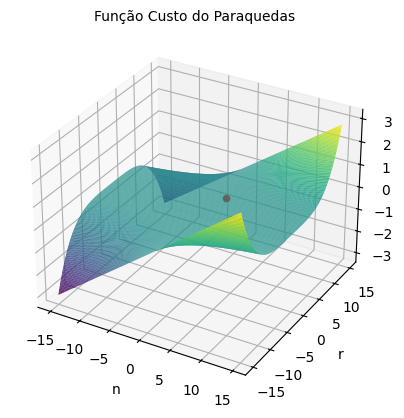

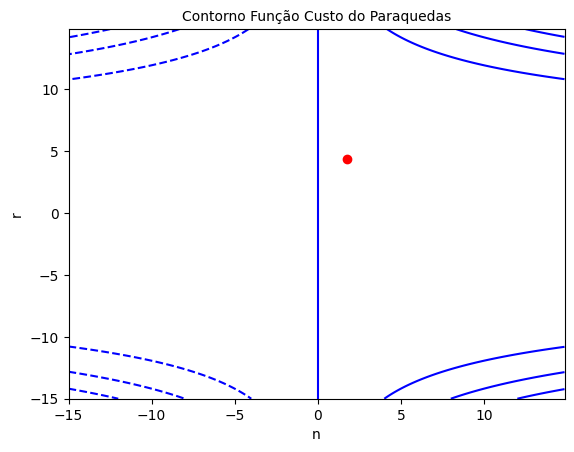

In [19]:
def granSchimdt (results, d, dim):
    """Algoritmo de ortogonalizacão de Gran Schimidt"""
    
    a1 = 0
    a2 = 0
    b2 = 0

    for i in range(dim):
        if i == 0:
            for j in range(dim):
                a1 += results[j] * d[j]
                    
            d[i] = a1 / LA.norm(a1)

            # print(f'a1 = {a1} d1 = {d[0]}')
        else:
            for j in range(1, dim):
                a2 += results[j] * d[j]

            for j in range(dim-1):
                b2 += (np.transpose(a2) @ d[j]) * d[j]
            
            b2 = a2 - b2

            d[i] = b2 / LA.norm(b2)

            # print(f'a2 = {a2} d2 = {d[1]}')
            # print(f'b2 = {b2} d2 = {d[1]}')

def rosenbrook(valorInicial, constantes, dimensao):
    """Função que implementa o método de busca multivariável Rosenbrock."""
    
    [n, r] = np.copy(valorInicial)
    d = np.array(
        [[1.0,0.0], 
        [0.0,1.0]]
    )

    e = 1e-2
    k = 0
    timeout = 100
    time = 0
    novoPonto = np.array([0.0, 0.0])
    pontoInicial = np.copy([n, r])
    tamanhoIntervalo = 5
    
    
    while time < timeout:
           
        # print(f'\nIteração {time}==========================')
        # print(f'Início: {pontoInicial}')
        
        for k in range(dimensao):          
            d1, d2 = d[k][0], d[k][1]

            intervalo = [-tamanhoIntervalo + n if k == 0 else -tamanhoIntervalo + r, tamanhoIntervalo + n if k == 1 else tamanhoIntervalo + r]

            lmbda = goldenSectionSearch(intervalo, constantes, [n, r], [d1, d2])

            n, r = n + lmbda * d1, r + lmbda * d2

            # print(f'Busca {d[k]}: ponto ótimo: {lmbda} => novo ponto: [{n}, {r}]')
        
        novoPonto = np.array([n, r])

        direcaoPrincip = novoPonto - pontoInicial

        d1, d2 = direcaoPrincip[0], direcaoPrincip[1]

        intervalo = [-tamanhoIntervalo + n , tamanhoIntervalo + r]
        lmbda = goldenSectionSearch(intervalo, constantes, [n, r], [d1, d2])

        n, r = n + lmbda * d1, r + lmbda * d2

        if LA.norm([n, r] - pontoInicial) < e:
            break

        # print(f'Busca [{d1},{d2}]: ponto ótimo: {lmbda} => novo ponto: [{n}, {r}]')
        
        granSchimdt(direcaoPrincip, d, dimensao)
        pontoInicial = novoPonto
        
        time += 1

    return [n, r]
    
# Define a semente fixa para reprodutibilidade
semente = 42
np.random.seed(semente)

# Gera 100 pontos com duas coordenadas aleatórias
qtdPontos = 100
coordenadasPorPonto = 2

pontos = np.random.uniform(0, 5, (qtdPontos, coordenadasPorPonto))

minimos = []
constantes = [1.0, 2.0, 1.0]

print(f'======== Resultado Rosenbrock\n')
for i, (x, y) in enumerate(pontos, start=1):
    min = rosenbrook([x, y], constantes, 2)
    print(f'Ponto {i}: [{x}, {y}] Mínimo={min}')
    minimos.append(min)

minimos = np.array(minimos)
media = np.array([np.mean(minimos[:, 0]), np.mean(minimos[:, 1])])
desvioPadrao = np.array([np.std(minimos[:, 0]), np.std(minimos[:, 1])])
 
print(f'\nMédia dos valores: {media}')
print(f'Desvio Padrão dos valores: {desvioPadrao}')

plot3D(media, constantes, 15)
plotContour(media, constantes, 15)